In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

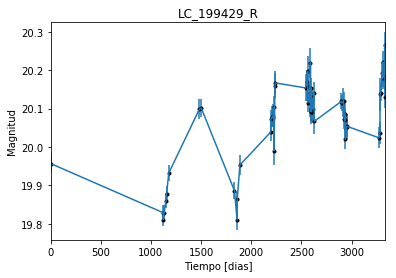

In [2]:
data = np.genfromtxt('LC_199429_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_199429_R')
plt.savefig("LC_199429_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

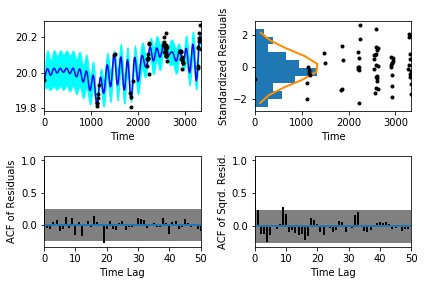

In [5]:
sample.assess_fit()

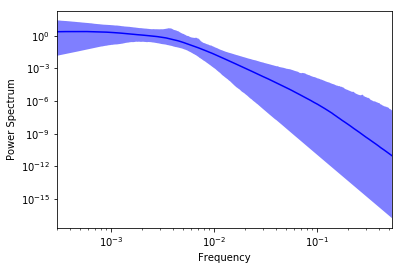

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

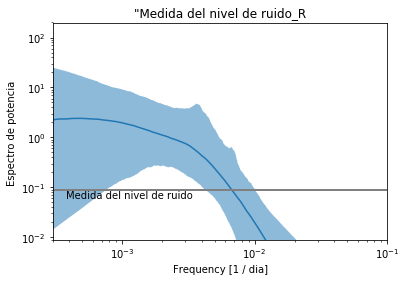

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_199429_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_199429_R')

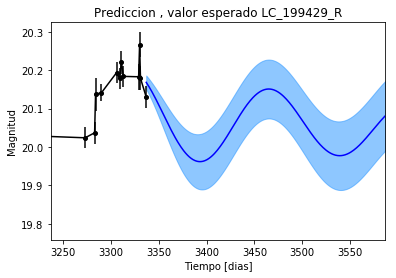

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_199429_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_199429_R')

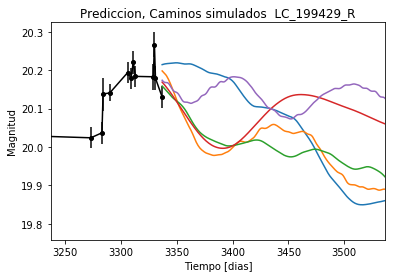

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_199429_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


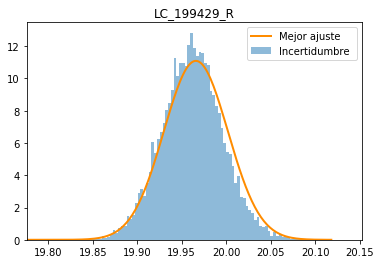

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_199429_R')
plt.savefig("Mejor_ajuste_LC_199429_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_199429_R')

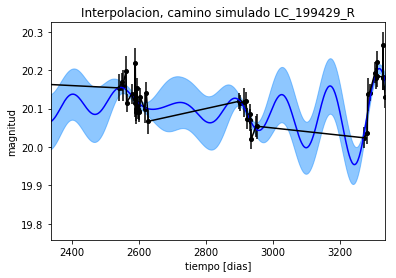

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_R')

Text(0.5,1,'Interpolacion, camino simulado LC_199429_R')

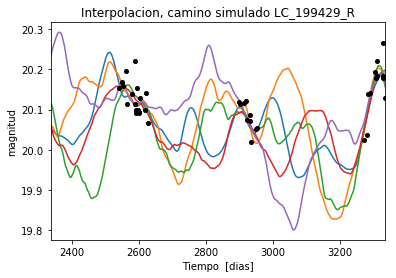

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 298.930570135
Median: 0.00443235831003
Standard deviation: 0.180104999065
68% credibility interval: [ 0.00069063  0.08713026]
95% credibility interval: [  3.38724035e-04   7.31297984e-01]
99% credibility interval: [  3.11236029e-04   1.01901599e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 356.610823307
Median: 0.00183553080194
Standard deviation: 0.0722783408454
68% credibility interval: [ 0.000542    0.01479029]
95% credibility interval: [ 0.00032782  0.18348999]
99% credibility interval: [  3.06599133e-04   5.85328412e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 547.758919791
Median: 0.0197360197771
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 831.122702921
Median: 127.670153542
Standard deviation: 1.75000467355
68% credibility interval: [ 125.76931455  129.06085001]
95% credibility interval: [ 123.2502166  129.9957874]
99% credibility interval: [ 121.03551188  130.28649192]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 155.882862065
Median: 0.517212441646
Standard deviation: 2.09066454814
68% credibility interval: [ 0.06245927  3.38732371]
95% credibility interval: [ 0.02085374  7.15146877]
99% credibility interval: [ 0.01133371  9.90040574]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 612.183076916
Median: 0.182517416566
Standard deviation: 8.08333492691
68% credibility interval: [ 0.0063801   5.34090116]
95% credibility interval: [  1.38557396e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 217.285175853
Median: 1.61696707484e-34
Standard deviation: 5.55839248373e+84
68% credibility interval: [  9.10872038e-80   4.83918542e+19]
95% credibility interval: [  4.35485512e-143   3.03005405e+075]
99% credibility interval: [  1.59315324e-155   3.10942773e+085]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2942.48013358
Median: 20.0351688605
Standard deviation: 0.0481361657291
68% credibility interval: [ 19.9942066   20.07445443]
95% credibility interval: [ 19.93289514  20.12446493]
99% credibility interval: [ 19.870721    20.18114443]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 871.767807372
Median: 0.00454615112243
Standard deviation: 0.228000279168
68% credibility interval: [ 0.          0.23944368]
95% credibility interval: [ 0.         0.8635903]
99% credibility interval: [ 0.          1.01369763]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 871.767807372
Median: 0.00454615112243
Standard deviation: 0.228000279168
68% credibility interval: [ 0.          0.23944368]
95% credibility interval: [ 0.         0.8635903]
99% credibility interval: [ 0.          1.01369763]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 566.13116345
Median: 0.0
Standard deviation: 0.0013468507913
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 831.122702921
Median: 127.670153542
Standard deviation: 1.75000467355
68% credibility interval: [ 125.76931455  129.06085001]
95% credibility interval: [ 123.2502166  129.9957874]
99% credibility interval: [ 121.03551188  130.28649192]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1366.2088963
Median: 0.0152428660743
Standard deviation: 0.0148741724623
68% credibility interval: [ 0.0095881   0.02696287]
95% credibility interval: [ 0.00661309  0.05364624]
99% credibility interval: [ 0.00531746  0.08545285]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2643.9919336
Median: 1.17387373657
Standard deviation: 0.181333235995
68% credibility interval: [ 1.01796736  1.36815852]
95% credibility interval: [ 0.87589954  1.59866611]
99% credibility interval: [ 0.79875968  1.76018078]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1030.68870491
Median: 5.87077527721e-05
Standard deviation: 0.0392098017022
68% credibility interval: [  7.50752229e-24   4.17266639e-03]
95% credibility interval: [  7.17667330e-79   3.67434947e-02]
99% credibility interval: [  2.02019037e-90   1.43563947e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 298.930570135
Median: (-0.0278493286098+0j)
Standard deviation: 1.82560798719
68% credibility interval: [-0.54745557-0.83012507j -0.00433939-5.10775466j]
95% credibility interval: [ -4.59488075e+00+0.j          -2.12826588e-03-0.04241887j]
99% credibility interval: [ -6.40266627e+00+0.j          -1.95555364e-03-0.02376985j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 356.610823307
Median: (-0.0115329801656+0j)
Standard deviation: 1.50282820025
68% credibility interval: [-0.09293016+1.82275838j -0.00340546+2.11594417j]
95% credibility interval: [-1.15290163+1.60795115j -0.00205976+0.j        ]
99% credibility interval: [ -3.67772688e+00+2.47870839j  -1.92641917e-03+0.0240829j ]
Posterior summary for parameter ar_roo